### 과제 1

조기 종료를 사용한 배치 경사 하강법으로 로지스틱 회귀를 구현하라.
단, 사이킷런을 전혀 사용하지 않아야 한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

데이터 준비

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

편향 추가

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]   #2열 -> 3열로 증가

랜덤시드 지정

In [ ]:
np.random.seed(1234)  #결과를 일정하게 하기 위해 random seed 배정

데이터 셋을 수동으로 무작위 분할

In [ ]:
test_ratio = 0.2                                         # 테스트 세트 비율 = 20%
validation_ratio = 0.2                                   # 검증 세트 비율 = 20%
total_size = len(X_with_bias)                            # 전체 데이터셋 크기

test_size = int(total_size * test_ratio)                 # 테스트 세트 크기: 전체의 20%
validation_size = int(total_size * validation_ratio)     # 검증 세트 크기: 전체의 20%
train_size = total_size - test_size - validation_size    # 훈련 세트 크기: 전체의 60%

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

타깃 변환

In [ ]:
y_train[:5]

array([1, 1, 2, 0, 1])

**로지스틱 모델 구현**



먼저 로지스틱에 사용되는 시그모이드 함수를 만든다.

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

In [ ]:
def logistic(logits):
    return 1.0 / (1 + np.exp(-logits))

가중치를 조정해나가기 위한 세타를 생성한다. 초기값은 랜덤이다.

여기에서 n은 특성이 두개이므로 2가된다.

$$
\begin{align*}
\hat y^{(i)} & = \theta^{T}\, \mathbf{x}^{(i)} \\
 & = \theta_0 + \theta_1\, \mathbf{x}_1^{(i)} + \cdots + \theta_n\, \mathbf{x}_n^{(i)}
\end{align*}
$$

In [ ]:
n_inputs = X_train.shape[1] #편향과 특성의 갯수
Theta = np.random.randn(n_inputs) #편향과 특성의 갯수만큼 세타값 랜덤초기화

**cost function 구현**

$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$

위의 수식을 코드로 표현하면 다음과 같다.

-np.mean(np.sum((y_train*np.log(Y_proba + epsilon) + (1-y_train)*np.log(1 - Y_proba + epsilon))))


배치 경사하강법 훈련은 아래 코드를 통해 이루어진다.

- `eta = 0.01`: 학습률
- `n_iterations = 5001` : 에포크 수
- `m = len(X_train)`: 훈련 세트 크기, 즉 훈련 샘플 수
- `epsilon = 1e-7`: $\log$ 값이 항상 계산되도록 더해지는 작은 실수
- `logits`: 모든 샘플에 대한 클래스별 점수, 즉 $\mathbf{X}_{\textit{train}}\, \Theta$
- `Y_proba`: 모든 샘플에 대해 계산된 클래스 별 소속 확률, 즉 $\hat P$

In [ ]:
#  배치 경사하강법 구현
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

for iteration in range(n_iterations):     # 5001번 반복 훈련
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    if iteration % 500 == 0:              # 500 에포크마다 손실(비용) 계산해서 출력
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    
    error = Y_proba - Y_train_one_hot     # 그레이디언트 계산.
    gradients = 1/m * X_train.T.dot(error)
    
    Theta = Theta - eta * gradients       # 파라미터 업데이트

0 3.1114915802681646
500 0.8785451855619314
1000 0.7103533106437264
1500 0.6136193727911318
2000 0.5518526140625929
2500 0.5086585463656746
3000 0.4762907516068719
3500 0.45076167129780975
4000 0.42984346695974646
4500 0.41220116725499784
5000 0.39698683289431375


In [ ]:
#모델 파라미터 확인
Theta

array([[ 2.68979228, -0.7826269 , -2.70314023],
       [-0.39955204,  0.45023269,  0.05089443],
       [-2.42533074, -0.66589863,  1.80156464]])

코드의 세부동작은 다음과 같다.

1.   logits = X_train.dot(Theta) 에서 행렬연산을 이용해 세타와 x값을 곱하여 logits 값을 얻는다.
2.   Y_proba = logistic(logits) 에 logits값을 시그모이드 함수에 넣어 Y_proba값을 얻는다.

3.   손실함수 계산을 통해 손실비용 loss를 얻는다.

4.   y의 확률값과 실제 y의값의 차이 error를 얻는다.

5.   이를 통해 gradient 계산을한다.

6.   세타에 학습률 * gradient만큼의 값을 빼서 세타값 재조정을 한뒤 다음 에포크로 넘어간다.



**검증**

위에서 얻은 세타값을 가지고
검증세트로 모델 성능을 판단한다.

Y_proba값이 0.5 이상이라면 버지니아로, 아니라면 버지니아가 아니라고 입력해준다.

In [ ]:
#검증 세트에 대한 정확도 확인
logits = X_valid.dot(Theta)              
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)          # 가장 높은 확률을 갖는 클래스 선택

accuracy_score = np.mean(y_predict == y_valid)  # 정확도 계산
accuracy_score

0.9

정확도는 위와같다.

이번엔 직접 데이터를 살펴보자.

In [ ]:
y_predict

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_valid

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

**모델 규제**

일반적으로 l2규제를 사용한다.

코드에서 규제 작동 메커니즘은

$$
\begin{align*}
J(\boldsymbol{\theta}) & = \text{MSE}(\boldsymbol{\theta}) + \dfrac{\alpha}{2}\sum\limits_{i=1}^{n}{\theta_i}^2 \\
& = \text{MSE}(\boldsymbol{\theta}) + \dfrac{\alpha}{2}\left (\theta_1^2 + \cdots + \theta_n^2 \right )
\end{align*}
$$

수식의 계산된 값을 loss에 추가하고, 이를 gradient에 반영함으로써 이루어진다.

L2 규제 추가

In [ ]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1        # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)  # 파라미터 새로 초기화

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))  # 편향은 규제에서 제외
        loss = xentropy_loss + alpha * l2_loss        # l2 규제가 추가된 손실
        print(iteration, loss)
    
    error = Y_proba - Y_train_one_hot
    l2_loss_gradients = np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]   # l2 규제 그레이디언트
    gradients = 1/m * X_train.T.dot(error) + l2_loss_gradients
    
    Theta = Theta - eta * gradients

0 6.135593777893689
500 0.538428329796786
1000 0.5093655628163154
1500 0.5009568607421142
2000 0.49788080792901773
2500 0.4966559287329126
3000 0.49614679586131877
3500 0.4959299026541329
4000 0.4958361134372299
4500 0.495795173863377
5000 0.4957771952771175


In [ ]:
#검증 세트에 대한 정확도 확인
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

점수가 조금 떨어졌으나 중요한것은 테스트세트에 대한 성능이다.

이번에는 조기종료 기능을 추가한다.

조기종료는 검증세트에 대한 손실값이 이전 단계보다 커지면
바로 종료되는 기능이다. 이를 코드로 구현하면 다음과 같다.

조기 종료 추가

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1            # 규제 하이퍼파라미터
best_loss = np.infty   # 최소 손실값 기억 변수

Theta = np.random.randn(n_inputs, n_outputs)  # 파라미터 새로 초기화

for iteration in range(n_iterations):
    # 훈련 및 손실 계산
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    # 검증 세트에 대한 손실 계산
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    # 500 에포크마다 검증 세트에 대한 손실 출력
    if iteration % 500 == 0:
        print(iteration, loss)
        
    # 에포크마다 최소 손실값 업데이트
    if loss < best_loss:
        best_loss = loss
    else:                                      # 에포크가 줄어들지 않으면 바로 훈련 종료
        print(iteration - 1, best_loss)        # 종료되지 이전 에포크의 손실값 출력
        print(iteration, loss, "조기 종료!")
        break

0 4.692601117197848
500 0.5947824540910525
1000 0.57095652195923
1500 0.5644308826502331
2000 0.5623822607791571
2500 0.5617742430419854
3000 0.5616520423831578
3057 0.5616512161922435
3058 0.5616512162651615 조기 종료!


테스트 셋에 대하여 정확도를 판별한다.

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score
#학습이 더 빠르게 종료됨

0.9333333333333333

점수가 매우 높게나왔다.

이제 실제 로지스틱 모델과 얼마나 차이가 나는지 확인해보자.

**사이킷런 로지스틱 모델과 성능비교**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

기준이 정확도였으므로 성능 확인 기준역시 정확도로 둔다.

정확도를 구하는 법은 두가지가 있다.

In [ ]:
log_reg.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

실제 모델과 유사한 성능임을 확인할수 있다.

### 과제 2

과제 1에서 구현된 로지스틱 회귀 알고리즘에 일대다(OvR) 방식을 적용하여 붓꽃에 대한 다중 클래스 분류 알고리즘을 구현하라. 단, 사이킷런을 전혀 사용하지 않아야 한다.


과제2를 수행하기 위해서는 로지스틱 모델을 2개를 사용해야한다. 

먼저 setosa인지 아닌지를 판단하는 모델

그리고 virginica인지 아닌지를 판단하는 모델을 각각 만든후에

versicolor일 확률은 1 - setosa일 확률 - virginica 확률로 계산해준다.

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]
y0 = (iris["target"] == 0).astype(np.int) #setosa 판단 모델을 위한 데이터셋
y1 = (iris["target"] == 2).astype(np.int) #virginica 판단 모델을 위한 데이터셋

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X] #편향추가

In [ ]:
np.random.seed(2042) #일정한 결과를 위해 랜덤시드 지정

In [ ]:
test_ratio = 0.2                                         # 테스트 세트 비율 = 20%
validation_ratio = 0.2                                   # 검증 세트 비율 = 20%
total_size = len(X_with_bias)                            # 전체 데이터셋 크기

test_size = int(total_size * test_ratio)                 # 테스트 세트 크기: 전체의 20%
validation_size = int(total_size * validation_ratio)     # 검증 세트 크기: 전체의 20%
train_size = total_size - test_size - validation_size    # 훈련 세트 크기: 전체의 60%

In [ ]:
rnd_indices = np.random.permutation(total_size) #데이터 섞기

모델 훈련은 각 클래스에 대해 각각 이루어지기 때문에
데이터셋도 개별적으로 준비해준다.

In [ ]:
X_train = X_with_bias[rnd_indices[:train_size]] 
y_train = y[rnd_indices[:train_size]]
y_train0 = y0[rnd_indices[:train_size]] #setosa에 대한 라벨
y_train1 = y1[rnd_indices[:train_size]] #virginica에 대한 라벨

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
y_valid0 = y0[rnd_indices[train_size:-test_size]] #setosa에 대한 검증세트 라벨
y_valid1 = y1[rnd_indices[train_size:-test_size]] #virginica에 대한 검증세트 라벨

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
n_inputs = X_train.shape[1]
Theta0 = np.random.randn(n_inputs) #setosa 판단모델에 쓰이는 세타값
Theta1 = np.random.randn(n_inputs) #virginica 판단모델에 쓰이는 세타값

**setosa 판별 로지스틱 회귀 모델**

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.5            # 규제 하이퍼파라미터
best_loss0 = np.infty   # 최소 손실값 기억 변수

Theta0 = np.random.randn(n_inputs)  # 파라미터 새로 초기화

for iteration in range(n_iterations):
    # 훈련 및 손실 계산
    logits0 = X_train.dot(Theta0)
    Y_proba0 = logistic(logits0)
    error = Y_proba0 - y_train0
    gradients0 = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1]), alpha * Theta0[1:]]
    Theta0 = Theta0 - eta * gradients0

    # 검증 세트에 대한 손실 계산
    logits0 = X_valid.dot(Theta0)
    Y_proba0 = logistic(logits0)
    xentropy_loss0 = -np.mean(np.sum((y_valid0*np.log(Y_proba0 + epsilon) + (1-y_valid0)*np.log(1 - Y_proba0 + epsilon))))
    l2_loss0 = 1/2 * np.sum(np.square(Theta0[1:]))
    loss0 = xentropy_loss0 + alpha * l2_loss0
    
    # 500 에포크마다 검증 세트에 대한 손실 출력
    if iteration % 500 == 0:
        print(iteration, loss0)
        
    # 에포크마다 최소 손실값 업데이트
    if loss0 < best_loss0:
        best_loss0 = loss0
    else:                                      # 에포크가 줄어들지 않으면 바로 훈련 종료
        print(iteration - 1, best_loss0)        # 종료되기 이전 에포크의 손실값 출력
        print(iteration, loss0, "조기 종료!")
        break

0 20.540019459712514
500 7.744571615343959
1000 7.672989036271927
1500 7.668592640555666
2000 7.668314272027711
2500 7.668296612120626
3000 7.668295491624586
3500 7.668295420530142
4000 7.668295416019264
4500 7.668295415733049
5000 7.668295415714894


In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.5            # 규제 하이퍼파라미터
best_loss1 = np.infty   # 최소 손실값 기억 변수

Theta1 = np.random.randn(n_inputs)  # 파라미터 새로 초기화

for iteration in range(n_iterations):
    # 훈련 및 손실 계산
    logits1 = X_train.dot(Theta1)
    Y_proba1 = logistic(logits1)
    error = Y_proba1 - y_train1
    gradients1 = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1]), alpha * Theta1[1:]]
    Theta1 = Theta1 - eta * gradients1

    # 검증 세트에 대한 손실 계산
    logits1 = X_valid.dot(Theta1)
    Y_proba1 = logistic(logits1)
    xentropy_loss1 = -np.mean(np.sum((y_valid1*np.log(Y_proba1 + epsilon) + (1-y_valid1)*np.log(1 - Y_proba1 + epsilon))))
    l2_loss1 = 1/2 * np.sum(np.square(Theta1[1:]))
    loss1 = xentropy_loss1 + alpha * l2_loss1
    
    # 500 에포크마다 검증 세트에 대한 손실 출력
    if iteration % 500 == 0:
        print(iteration, loss1)
        
    # 에포크마다 최소 손실값 업데이트
    if loss1 < best_loss1:
        best_loss1 = loss1
    else:                                      # 에포크가 줄어들지 않으면 바로 훈련 종료
        print(iteration - 1, best_loss1)        # 종료되기 이전 에포크의 손실값 출력
        print(iteration, loss1, "조기 종료!")
        break

0 45.38818486389959
500 12.482904005693054
1000 11.947222069327108
1500 11.864096195806566
2000 11.849273910674974
2500 11.846566475123907
3000 11.846069764314986
3500 11.845978563684064
4000 11.845961815948371
4500 11.845958740374874
5000 11.845958175570198


**이제 테스트셋에 적용해본다.**

위에서 구한 두개의 세타값을 이용해

1.   setosa일 확률(setosa_proba)
2.   virginica일 확률(virginica_proba)
3.   versicolor일 확률(1 - setosa_proba - virginica_proba)

셋중에 가장 높은것을 채택하여 분류를 진행한다.


In [ ]:
logits = X_test.dot(Theta0) #setosa에 대한 확률값 추정  
setosa_proba = logistic(logits)

logits = X_test.dot(Theta1) #virginica에 대한 확률값 추정 
virginica_proba = logistic(logits)

y_predict = np.array([])
for i in range(len(Y_proba0)):
  prob_list = [[setosa_proba[i], 0], [1-setosa_proba[i]-virginica_proba[i], 1], [virginica_proba[i], 2]]
  prob_list.sort(reverse=True) #가장 높은 확률이 가장 앞으로 오게끔 정렬해준다.
  y_predict = np.append(y_predict, prob_list[0][1]) #가장 확률이 높았던 것을 예측값으로 결정한다.

In [ ]:
accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

약 0.93점으로 괜찮은 점수가 나왔다.

이제 사이킷런의 로지스틱 모델과의 성능을 비교해보자.

모델의 solver 값을 'newton-cg'로 주면 multinomial logistic regression모델을 세울수있다.

In [ ]:
from sklearn.linear_model import LogisticRegression
multi_log_reg = LogisticRegression(solver='newton-cg', random_state=42).fit(X_train,y_train)

multi_log_reg.score(X_test,y_test)

0.9333333333333333

직접 구현한 코드와 사이킷런에 내장되어있는 로지스틱 모델과 성능이 같음을 확인할수 있었다.

소프트맥스 함수 구현

In [ ]:
def softmax(logits):
    exps = np.exp(logits)                            # 항목별 지수함수 적용
    exp_sums = np.sum(exps, axis=1, keepdims=True)   # 샘플별 클래스 점수 합산
    return exps / exp_sums                           # 샘플별 소프트맥스 점수로 이루어진 어레이 반환

전체 데이터셋에 대한 모델 예측 그래프

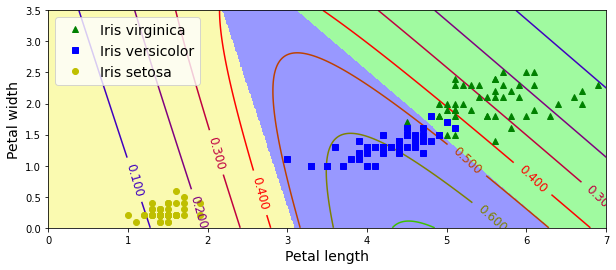

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

# 직사각형 점 대상 예측하기
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

# 등고선용 정보
zz1 = Y_proba[:, 1].reshape(x0.shape)                            # 버시컬러 기준 예측 확률
zz = y_predict.reshape(x0.shape)                                 # 예측값

# 붓꽃 샘플 그리기
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")   # 녹색 삼각형, 버지니카
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")  # 파랑 사각형, 버시컬러
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")      # 노랑 원, 세토사

# 등고선 그리기
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)                       # 노랑, 청보라, 녹색 바탕색
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)              # 버시컬러 기준 예측 확률 등고선
plt.clabel(contour, inline=1, fontsize=12)

# 기타 도표 정보
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

최종 테스트 데이터 예측

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score
#매우 정확한 예측도를 보임

1.0

### 과제 3

A. 사진을 낮과 밤으로 분류하는 로지스틱 회귀 모델을 구현하라.

직접 수집한 이미지를 구글드라이브를 통해 다운로드받기

In [ ]:
from urllib import request
url = "https://docs.google.com/uc?export=download&id=1emB4lSxEzxzEt7_20w2DZ_Dw1sYS1grA"
request.urlretrieve(url,"day_night.zip")

('day_night.zip', <http.client.HTTPMessage at 0x7f9216457510>)

파일을 압축해제하기

In [ ]:
import os
import zipfile

local_zip = '/content/day_night.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

작업에 필요한 모듈 임포트

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
# Any results you write to the current directory are saved as output.

label과 train, test에 따라 경로 지정하기

In [ ]:
train_day = "day_night/train/day"
train_night= "day_night/train/night"
test_day= "day_night/test/day"
test_night= "day_night/test/night"
image_size = 128

위의 과정이 제대로 되었는지 확인하기 위해 시험삼아 이미지를 불러온다.

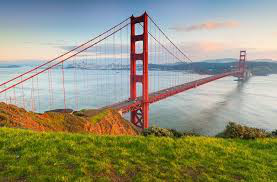

In [ ]:
Image.open("day_night/train/day/day_120.jpg")

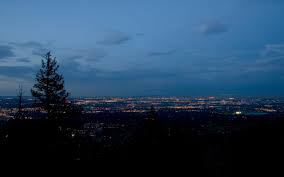

In [ ]:
Image.open("day_night/train/night/night_120.jpg")

수집되어있는 사진들은 사이즈가 모두 제각각이다.

머신러닝은 사진의 크기에 따라 특성수를 다르게 받아들이기때문에
이를 조정해주는 작업이 필요하다.

이를 resize라하고, 코드는 아래와 같다.

100%|██████████| 400/400 [00:00<00:00, 1439.68it/s]


Text(0.5, 1.0, 'day and night in GrayScale')

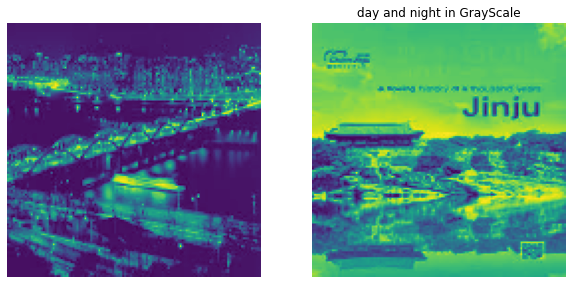

In [ ]:
for image in tqdm(os.listdir(train_night)): 
    path = os.path.join(train_night, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_day)): 
    path = os.path.join(train_day, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("day and night in GrayScale")

경로에 따라 나뉘어져 있는 낮과 밤사진들을

하나의 트레이닝 셋으로 합쳐주는 과정이 필요하다.

이 과정에 데이터 라벨링이 완료된다.

In [ ]:
def train_data():
    train_data_night = [] 
    train_data_day=[]
    for image1 in tqdm(os.listdir(train_night)): 
        path = os.path.join(train_night, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_night.append(img1) 
    for image2 in tqdm(os.listdir(train_day)): 
        path = os.path.join(train_day, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_day.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_night),np.asarray(train_data_day)),axis=0)
    return train_data 

같은 작업을 테스트셋에 대해서도 해준다.

In [ ]:
def test_data():
    test_data_night = [] 
    test_data_day=[]
    for image1 in tqdm(os.listdir(test_night)): 
        path = os.path.join(test_night, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_night.append(img1) 
    for image2 in tqdm(os.listdir(test_day)): 
        path = os.path.join(test_day, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_day.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_night),np.asarray(test_data_day)),axis=0) 
    return test_data 

이제 트레인셋과 테스트셋 설정 해준다.

아래의 과정에서 features와 label을 분리하여 저장한다.

In [ ]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 100/100 [00:00<00:00, 1568.23it/s]


In [ ]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
z1 = np.zeros(400)
o1 = np.ones(400)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(100)
o = np.ones(100)
Y_test = np.concatenate((o, z), axis=0)

In [ ]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [ ]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1000, 128, 128)
Y shape:  (1000, 1)


사이킷런의 train_test_spilit 활용
train, test셋 분리하기.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (850, 16384)
X test flatten (150, 16384)


In [ ]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
day_night_y_test = y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 850)
x test:  (16384, 150)
y train:  (1, 850)
y test:  (1, 150)


데이터 전처리가 완료되었다.

다음으로 로지스틱 모델을 직접 구현해준다.

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

에포크는 1500으로, 학습률을 0.01으로 지정한뒤에 학습을 시작한다.

Cost after iteration 0: nan
Cost after iteration 100: 0.493764
Cost after iteration 200: 0.452712
Cost after iteration 300: 0.457164
Cost after iteration 400: 0.414077
Cost after iteration 500: 0.411219
Cost after iteration 600: 0.409035
Cost after iteration 700: 0.376400
Cost after iteration 800: 0.346463
Cost after iteration 900: 0.319091
Cost after iteration 1000: 0.293898
Cost after iteration 1100: 0.270654
Cost after iteration 1200: 0.249235
Cost after iteration 1300: 0.229576
Cost after iteration 1400: 0.211625


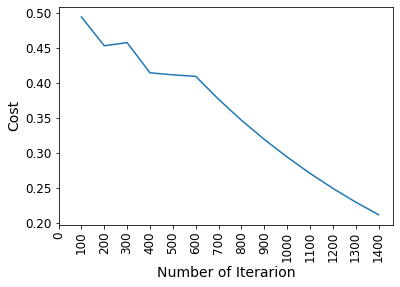

Test Accuracy: 78.67 %
Train Accuracy: 95.76 %


In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

train_set 비해 test_set에 대한 성능이 낮게 나왔음이 확인되었고,
과대적합이 의심된다.

B. 사진을 낮과 밤, 실내와 실외로 분류하는 다중 레이블 분류 모델을 두 개의 로지스틱 회귀 모델을 이용하여 구현하라.

두 개의 로지스틱 회귀모델중, 낮과 밤을 분류하는 모델은 위에서 이미 만들었으므로

여기에서는 먼저 실내와 실외를 분류하는 로지스틱 모델을 만들도록 한다.

과정은 낮과 밤을 분류할때와 거의 유사하므로 
비슷한부분은 아주 간단하게만 집고 넘어간다.

구글 드라이브에서 실내와 실외의 데이터 다운로드

In [ ]:
from urllib import request
url = "https://docs.google.com/uc?export=download&id=1CPbsXHOxFEAic3YQBxDdTDKEZXkXMdP1"
request.urlretrieve(url,"indoor_outdoor.zip")

('indoor_outdoor.zip', <http.client.HTTPMessage at 0x7f92162ae290>)

압축풀기

In [ ]:
import os
import zipfile

local_zip = '/content/indoor_outdoor.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

경로지정

In [ ]:
train_indoor = "indoor_outdoor/train/indoors"
train_outdoor= "indoor_outdoor/train/outdoors"
test_indoor= "indoor_outdoor/test/indoors"
test_outdoor= "indoor_outdoor/test/outdoors"
image_size = 128

제대로 다운로드가 완료되었는지 체크

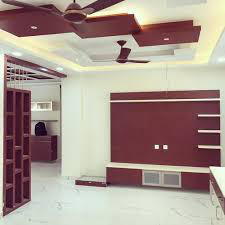

In [ ]:
Image.open("indoor_outdoor/train/indoors/indoors.101.jpg")

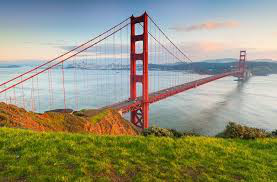

In [ ]:
Image.open("indoor_outdoor/train/outdoors/outdoors_120.jpg")

사진 리사이즈

100%|██████████| 400/400 [00:00<00:00, 1553.95it/s]


Text(0.5, 1.0, 'indoor and outdoor in GrayScale')

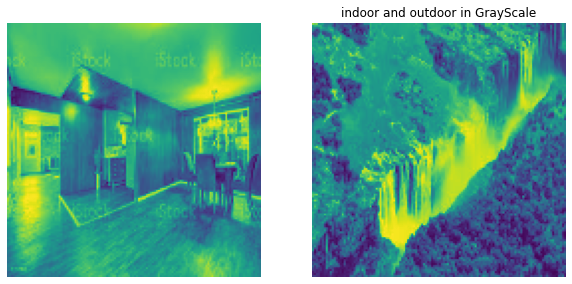

In [ ]:
for image in tqdm(os.listdir(train_indoor)): 
    path = os.path.join(train_indoor, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_outdoor)): 
    path = os.path.join(train_outdoor, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("indoor and outdoor in GrayScale")

트레인/데이터셋 구성하기

In [ ]:
def train_data():
    train_data_indoor = [] 
    train_data_outdoor=[]
    for image1 in tqdm(os.listdir(train_indoor)): 
        path = os.path.join(train_indoor, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_indoor.append(img1) 
    for image2 in tqdm(os.listdir(train_outdoor)): 
        path = os.path.join(train_outdoor, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_outdoor.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_indoor),np.asarray(train_data_outdoor)),axis=0)
    return train_data 

In [ ]:
def test_data():
    test_data_indoor = [] 
    test_data_outdoor=[]
    for image1 in tqdm(os.listdir(test_indoor)): 
        path = os.path.join(test_indoor, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_indoor.append(img1) 
    for image2 in tqdm(os.listdir(test_outdoor)): 
        path = os.path.join(test_outdoor, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_outdoor.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_indoor),np.asarray(test_data_outdoor)),axis=0) 
    return test_data 

In [ ]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 100/100 [00:00<00:00, 1554.97it/s]


In [ ]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
z1 = np.zeros(400)
o1 = np.ones(400)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(100)
o = np.ones(100)
Y_test = np.concatenate((o, z), axis=0)

In [ ]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [ ]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1000, 128, 128)
Y shape:  (1000, 1)


사이킷런 train_test_split을 이용해
트레이닝셋과 테스트셋 분리하기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (850, 16384)
X test flatten (150, 16384)


In [ ]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
out_doors_y_test = y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 850)
x test:  (16384, 150)
y train:  (1, 850)
y test:  (1, 150)


로지스틱 모델 구현

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

학습시작

Cost after iteration 0: nan
Cost after iteration 100: 3.499697
Cost after iteration 200: 3.608301
Cost after iteration 300: 3.318072
Cost after iteration 400: 3.163057
Cost after iteration 500: 3.053198
Cost after iteration 600: 2.962918
Cost after iteration 700: 2.880539
Cost after iteration 800: 2.802327
Cost after iteration 900: 2.728196
Cost after iteration 1000: 2.657614
Cost after iteration 1100: 2.589571
Cost after iteration 1200: 2.523354
Cost after iteration 1300: 2.458452
Cost after iteration 1400: 2.394409


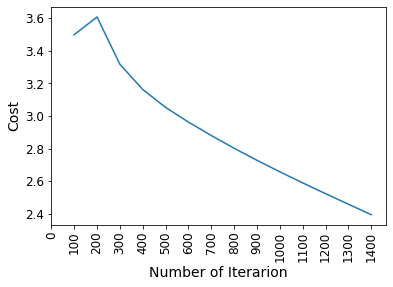

Test Accuracy: 58.0 %
Train Accuracy: 63.06 %


In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

결과가 매우 많이 좋지않다.

54%면 분류 모델의 존재이유가 의심된다.

학습에 충분한 데이터를 모으지 못했던게 원인으로 생각된다.

이번엔 마찬가지로 사이킷런과 성능비교를 해본다.

In [ ]:
in_out_y_train = np.array([])
for i in y_train:
  in_out_y_train = np.append(in_out_y_train, np.array([i]))

In [ ]:
in_out_y_test = np.array([])
for i in y_test:
  in_out_y_test = np.append(in_out_y_test, np.array([i]))

In [ ]:
in_out_y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.])

In [ ]:
from sklearn.linear_model import LogisticRegression

lg2 = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',C = 0.5,
                         multi_class='multinomial').fit(x_train.T, in_out_y_train)

In [ ]:
pred2 = lg2.predict(x_test.T)

In [ ]:
lg2.score(x_test.T, in_out_y_test)

0.6733333333333333

성능이 직접구현한것보다 좋게나왔지만 여전히 매우 좋지 않는 수치이다.

이로써 두개의 모델이 모두 준비되었으므로, 두개의 예측값을 합쳐서 하나의 array로 만들어 다중 라벨 분류를 완성한다.

마찬가지로 낮과밤, 실내실외의 라벨이 합쳐진 테스트셋과 비교하여 정확도 성능을 측정한다.

In [ ]:
multi_label_list = []
for i in range(len(pred1)):
 multi_label_list.append([pred1[i], pred2[i]]) # 낮과밤에 대한 예측결과와 실내실외에 대한 예측결과를 샘플별로 묶어서 리스트에 저장한다.

In [ ]:
multi_label_pred = np.array(multi_label_list) # 저장된 리스트를 array로 바꾼다.

In [ ]:
multi_label_test_list = []
for i in range(len(out_doors_y_test)):
 multi_label_test_list.append([day_night_y_test[0][i], out_doors_y_test[0][i]]) # 낮과밤, 실내실외에 대한 정답을 샘플별로 묶어서 리스트에 저장한다.

In [ ]:
multi_label_y_test = np.array(multi_label_test_list) # 저장된 리스트를 array로 바꿔준다.

이제 마지막으로 정확도를 측정한다.

In [ ]:
accuracy_score = np.mean(multi_label_pred == multi_label_y_test)
accuracy_score

0.5333333333333333

약 51%로 다중분류모델의 성능이 매우 좋지 않았음을 확인하였다.

규제값을 이리저리 바꿔보기도 했지만 큰 성능향상이 있지 않았고,

에포크수도 많이늘려보았지만 과대적합만 발생할뿐 이렇다할 변화가 있지는 않았다.

학습에 충분히 필요한 데이터를 모으지 못했던것, 그리고 좋음 품질의 샘플을 모으지 못했던것이

낮은 성능의 가장 큰 이유라고 생각된다.

C. 과제 1에서 구현한 자신의 알고리즘과 사이킷런에서 제공하는 LogisticRegression 모델의 성능을 비교하라. 

단, 모델 구현에 필요한 사진을 직접 구해야 한다. 최소 100장 이상의 사진 활용해야 한다.

사이킷런 LogisticRegression에 넣기위해 데이터의 형태를 맞춰준다.

In [ ]:
x_train.shape

(16384, 850)

In [ ]:
y_train.shape

(1, 850)

In [ ]:
y_train2 = np.array([])
for i in y_train:
  y_train2 = np.append(y_train2, np.array([i]))

In [ ]:
y_test2 = np.array([])
for i in y_test:
  y_test2 = np.append(y_test2, np.array([i]))

In [ ]:
y_train2.shape

(850,)

slover값을 'saga'로 지정, multi_class를 'multinomial'로 지정하면 로지스틱모델을 이용할수있다.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(x_train.T, y_train2)

In [ ]:
clf.score(x_test.T, y_test2)

0.7666666666666667

In [ ]:
pred1 = clf.predict(x_test.T)

직접 구현한 로지스틱 모델의 정확도는 약 74%
사이킷런에 내장된 로지스틱 모델의 정확도는 약 76%로

둘의 성능은 유사하나 사이킷런의 LogisiticRegression 모델이 좀더 우수함을 알수있다.